## Base de datos 
Esta es una base de datos extraida de https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset. En ella se exponen los datos de un hipermercado en varios años.

### Librerias necesarias para el analisis

In [12]:
import pandas as pd
import numpy as np
import time
import matplotlib
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

### Función auxiliar para graficar

In [13]:
def plot_easy_v2(c,df,df1,world,world1,world2):
    m=str(world)
    m1=str(world1)
    m2=str(world2)
    c1=[]
    Sales_total=[]
    Profit_total=[]
    for i in c:
        df1=df[df[m]==i]
        Sales_total.append(df1[m1].sum())
        Profit_total.append(df1[m2].sum())
        c1.append(str(i))  
    df11 = pd.DataFrame()
    df11[m]=c1 
    df11[m1]=Sales_total 
    df11[m2]=Profit_total 
    plt.figure(figsize=[5,5])
    plt.bar(df11[m],df11[m1] ,0.4,label = m1)
    plt.bar(df11[m],df11[m2] , 0.4 ,label = m2)
    plt.xticks(rotation=45)
    plt.xlabel(m)
    m3=str(m1+' vs '+m2)
    plt.ylabel(m3)
    plt.legend()
    plt.title(m3)
    plt.show()

### Exploración del Archivo
Visualización de las columnas o variables. 

In [14]:
df = pd.read_excel('Sample_Superstore.xls')
table_name = df.columns.values
print(table_name)

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


Los siguientes son los nombres de las columnas:
- Row ID (identificación de fila)
- Order ID (identifiación de la orden)
- Order Date (fecha de la orden)
- Ship Date (fecha de envio)
- Ship Mode (modo de envio) 
- Customer ID (identificación del cliente)
- Customer Name (nombre del cliente)
- Segment (segmento: Corporación o cliente)
- Country (pais)
- City (ciudad)
- State (estado)
- Postal Code (código postal)
- Region (región)
- Product ID (identifiación de producto)
- Category (categoria)
- Sub-Category (sub categorias)
- Product Name (nombre del producto)
- Sales (ventas)
- Quantity (cantidad)
- Discount (descuento)
- Profit (ganancia)

#### Descripción de las variables
- Descripción de las variables en la base de datos.

In [15]:
print(df.describe(include='all'))

             Row ID        Order ID                     Order Date  \
count   9994.000000            9994                           9994   
unique          NaN            5009                            NaN   
top             NaN  CA-2017-100111                            NaN   
freq            NaN              14                            NaN   
mean    4997.500000             NaN  2016-04-30 00:07:12.259355648   
min        1.000000             NaN            2014-01-03 00:00:00   
25%     2499.250000             NaN            2015-05-23 00:00:00   
50%     4997.500000             NaN            2016-06-26 00:00:00   
75%     7495.750000             NaN            2017-05-14 00:00:00   
max     9994.000000             NaN            2017-12-30 00:00:00   
std     2885.163629             NaN                            NaN   

                            Ship Date       Ship Mode Customer ID  \
count                            9994            9994        9994   
unique               

## Limpieza de los datos
- Realizamos un conteo de los datos inexistentes en la base datos.
- Realizamos un conteo de los datos NaN en la base datos.
- Eliminamos los datos repetidos en la base de datos.

En Conclusión no se presentaron datos inexistentes o duplicados en la base de datos. En total el archivo cuenta con 21 caracteristicas y 9994 filas de datos. 

In [16]:
null = df.isnull().sum() #suma las entradas nulas por cada variable
print('Cantidad de datos vacios:', null.sum()) # imprime el total
is_nan=df.isna().sum() #suma las entradas NaN por cada variable
print('Cantidad de datos NaN:',is_nan.sum()) # imprime el total
df = df.drop_duplicates() # elimina duplicados
print('Cantidad de filas: {} Cantidad de variables: {}'.format(df.shape[0],df.shape[1]))

Cantidad de datos vacios: 0
Cantidad de datos NaN: 0
Cantidad de filas: 9994 Cantidad de variables: 21


### Analisis por fechas:
- Usando la fecha de cada uno de las caracteriticas de dividen por año, mes y dia.
- Se crea un nuevo dataframe (df_year) para ordenar los datos por años
- Se crea un nuevo dataframe (df_month) para ordenar los datos por años
- Se crea un nuevo dataframe (df_day) para ordenar los datos por años

In [17]:
########## Agregando La columna Year, Month y Day
df['Year']=[i.year for i in df['Order Date']]
df['Month']=[i.month for i in df['Order Date']]
df['Name_month']=[datetime.strptime(str(i),'%m').strftime('%B') for i in df['Month']]
days=['Mon','Tues','Wednes','Thurs','Fri','Satur','Sun']
df['Day']=[days[i.weekday()]+"day" for i in df['Order Date']]

######### Ordenando por años
df_year=df.sort_values(by=['Year'])
df_year=df_year['Year'].unique()

########## Ordenando por meses
df_month=df.sort_values(by=['Month'])
df_month=df_month['Month'].unique()
df_month=[datetime.strptime(str(i),'%m').strftime('%B') for i in df_month]
# strptime- convierte a formato de fecha '%d/%m/%Y' 
# strftime- convierte a nombres los meses "%d %B, %Y"

########## Ordenando por Dias
df_day=df.sort_values(by=['Day'])
df_day=df_day['Day'].unique()
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Graficas analizando los datos por fechas 

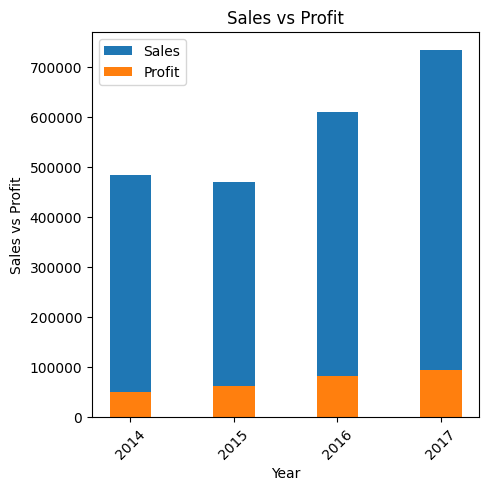

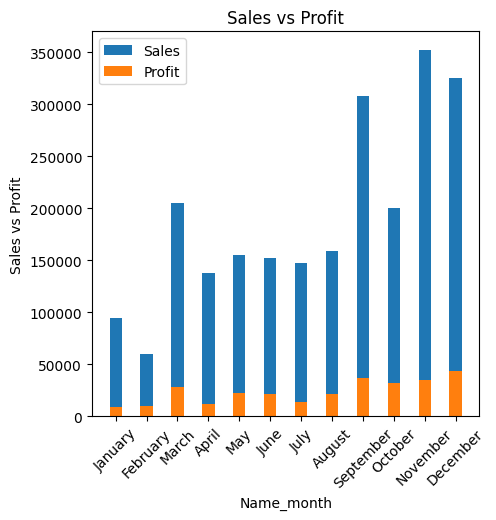

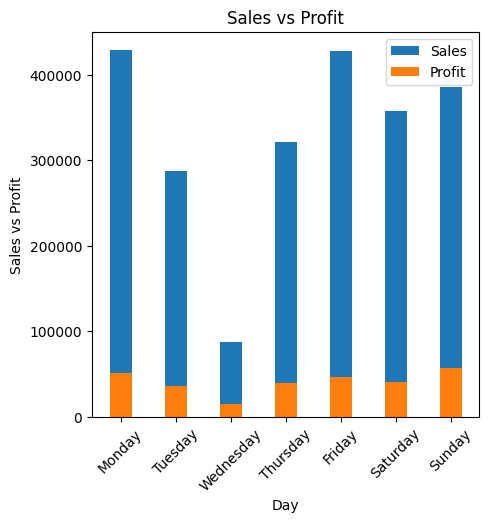

In [18]:
plot_easy_v2(df_year,df,df_year,'Year','Sales','Profit')
plot_easy_v2(df_month,df,df_month,'Name_month','Sales','Profit')
plot_easy_v2(days,df,df_day,'Day','Sales','Profit')

### ¿Cual es la fecha de la venta más grande?

In [19]:
max_sales = df[df['Sales']==df['Sales'].max()]
max_sales.reset_index(drop=True, inplace=True)
print('El producto con la mayor venta es: {}. Una cantidad de {} unidades '
      .format(max_sales.loc[0,'Product Name'],max_sales.loc[0,'Quantity'])) 
print('La fecha es: {}. '.format(max_sales.loc[0,'Order Date'])) 
print('La venta fue de {} y un descuento de {}'.format(max_sales.loc[0,'Sales'],max_sales.loc[0,'Profit'])) 

El producto con la mayor venta es: Cisco TelePresence System EX90 Videoconferencing Unit. Una cantidad de 6 unidades 
La fecha es: 2014-03-18 00:00:00. 
La venta fue de 22638.48 y un descuento de -1811.0784000000021


### Datos acumulados por dias
El siguiente es un analisis de ventas acumuladas por dias

In [20]:
df_acum_days=df.groupby(['Order Date'])["Sales"].sum().reset_index()
print('El día con la mayor cantidad de ganacias es: {}. Las ganacias acumuladas fueron: {} '
      .format(df_acum_days.max()['Order Date'],df_acum_days.max()['Sales']))

El día con la mayor cantidad de ganacias es: 2017-12-30 00:00:00. Las ganacias acumuladas fueron: 28106.716 


In [21]:
df7=df.sort_values(by=['Order Date'])
df7['week']=[i.isocalendar().week for i in df7['Order Date']]
print(df7)
#df7=df7.groupby(by='week')["Sales"].sum()

#plt.figure(figsize=[15,20])
#plt.plot(np.linspace(0,df7.shape[0],df7.shape[0]),df7['Sales'], 'bo')
#plt.show()

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
739      740  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
740      741  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
741      742  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
1759    1760  CA-2014-141817 2014-01-05 2014-01-12  Standard Class   
...      ...             ...        ...        ...             ...   
5091    5092  CA-2017-156720 2017-12-30 2018-01-03  Standard Class   
908      909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
907      908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
1296    1297  CA-2017-115427 2017-12-30 2018-01-03  Standard Class   
906      907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   

     Customer ID      Customer Name      Segment        Country  \
7980    DP-13000      Darren Powers     Consumer  United States   
739     PO-19195      Phi